In [1]:
import warnings
warnings.filterwarnings("ignore")
import control as c
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy as sp
import plotly.offline as py
py.init_notebook_mode(True)
s=c.tf([1,0],1)

Sistema baten irteera kontrolatu nahi da, bere transferentzia funtzioa hau izanik: 

$$G_{p}(s)={\displaystyle \frac{s+0.435}{(s^{2}+0.226*s+0.0169)*(s+1.3)*(s+2)}}$$

Kontrol-sistema inplementatzeko dispositibo digital bat erabiliko da eta, horretarako, ZOH bat sistemaren sarreran eta lagintzaile bat sistemaren irteeran kokatzen dira. Berrelikadura unitarioa da. Begizta itxian, maila sarreraren aurrean, espezifikazio hauek betetzea nahi da:

(a) Irteera-seinalearen gaindiketa azkenengo balioaren $\%16$ edo txikiagoa izango da, egonkorrean.

(b) Egonkorreko errorea %5a edo txikiagoa.

Diseinatu kontrolagailu bat, maiztasun eremuko teknikak erabiliz, egindako aukerak azalduz Aztertu maila sarreraren aurrean lortutako emaitza begizta itxian (denbora erantzuna, kontrol seinalea, ...). Baloratu egindako diseinua.

In [2]:
#sistema definituz
g2=(s+0.435)/(s**2+0.226*s+0.0169)/(s+1.3)/(s+2)

Lehengo lana da irabazia konpensatzea, gero lagintze maiztasuna aukeratzeko. Kontutan hartu behar da 0 motako sistema dela eta berrelikadura unitarioa

Kp=  19.0 K= [[1.91921839+0.j]]
Minimoa denez, K pixka bat handituko dut, K=3


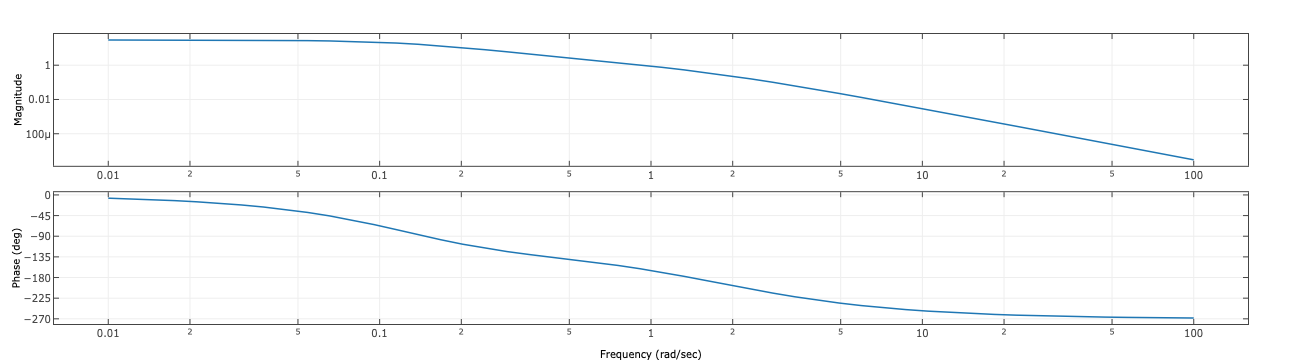

Lagintze periodoa:  0.3452299619329443


In [3]:
ess=0.05
Kp=1/ess-1
K=Kp/g2.horner(0)
print('Kp= ',Kp, 'K=', K)
print('Minimoa denez, K pixka bat handituko dut, K=3')
K=3

#lagintze maiztasuna aukeratzeko aukera bat: begizta irekiko irabazi kritikoko maiztasuna x20
c.bode(K*g2)
f=plt.gcf();py.iplot_mpl(f)
wik=0.91
Tl=2*sp.pi/wik/20
print('Lagintze periodoa: ', Tl)

In [4]:
g2z=c.c2d(g2,Tl)
g2z


0.0053 z^3 + 0.01183 z^2 - 0.011 z - 0.002676
---------------------------------------------
z^4 - 3.063 z^3 + 3.437 z^2 - 1.67 z + 0.296

dt = 0.3452299619329443

Sistema diskrertizatu eta gero, beste espezifikazioa erabiltzen da disenuaren Fase-margina lortzeko

In [5]:
R=16/100
d=1/((sp.pi/sp.log(R)**2)+1)
print('Indargetze koefizientea:',d,'Desiratzen den Fase-margina, gutxi gorabehera',100*d)

Indargetze koefizientea: 0.5166741476390663 Desiratzen den Fase-margina, gutxi gorabehera 51.66741476390663


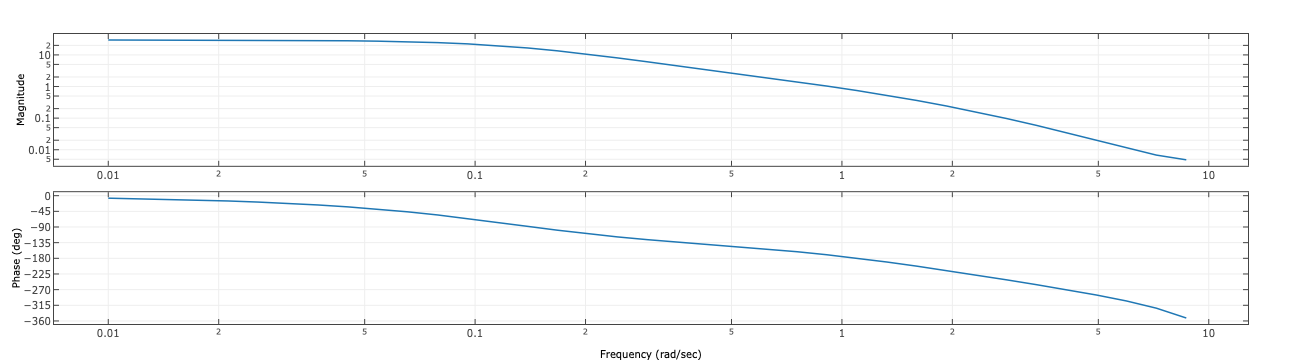

Dagoen fase-margina ~10


In [6]:
c.bode(K*g2z)
f=plt.gcf();py.iplot_mpl(f)
print('Dagoen fase-margina ~10')

Aukera bat baino gehiago dago, mugarik ez daudelako: atzerapen-sarea, aurrerapen-sarea, edo horien konbinazioa.

Sinpleagoa denez, atzerapen-sarea erabiliko da. Irabazi kritikoko maiztasun berria aukeratuta ~0.3. Puntu horretan irabazioa 6.05 denez, balio hori jaitsi behar da, atzerapen sareraren bitartez

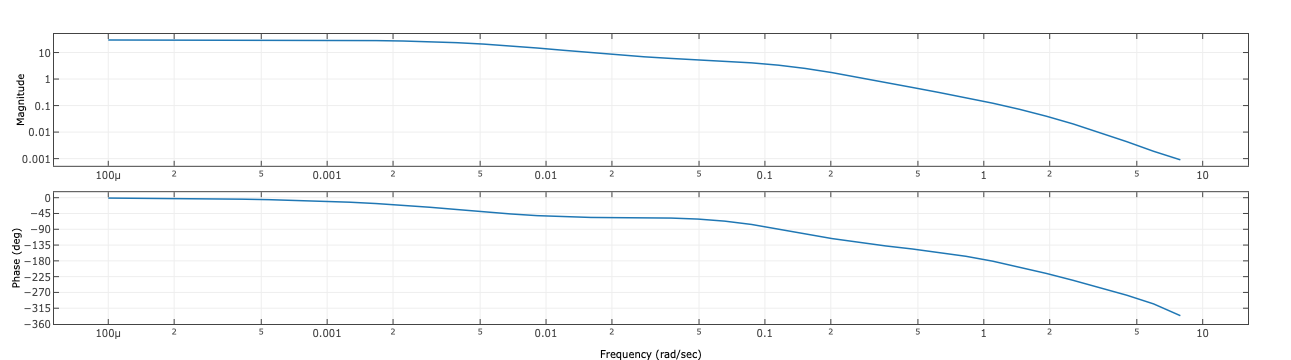

Fase-margin berria ~53


In [15]:
wik=0.3
a=1/6.05
Ta=10/wik/a
sarea=c.c2d(((1+a*Ta*s)/(1+Ta*s)),Tl)
c.bode(K*sarea*g2z)
f=plt.gcf();py.iplot_mpl(f)
print('Fase-margin berria ~53')
#print('Era zehatzean:', c.margins.stability_margins(K*sarea*g2z))

Orain, balorotuko da emaitza, denbora eremuan eta kontrol seinalea ikusita

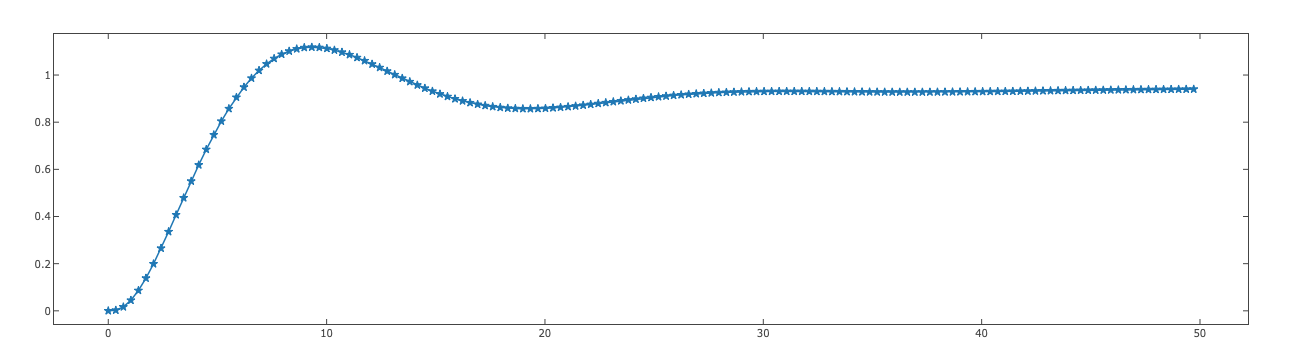

Gaindiketa : 0.15575784188983105
Gaindiketa : 0.1684210526315791


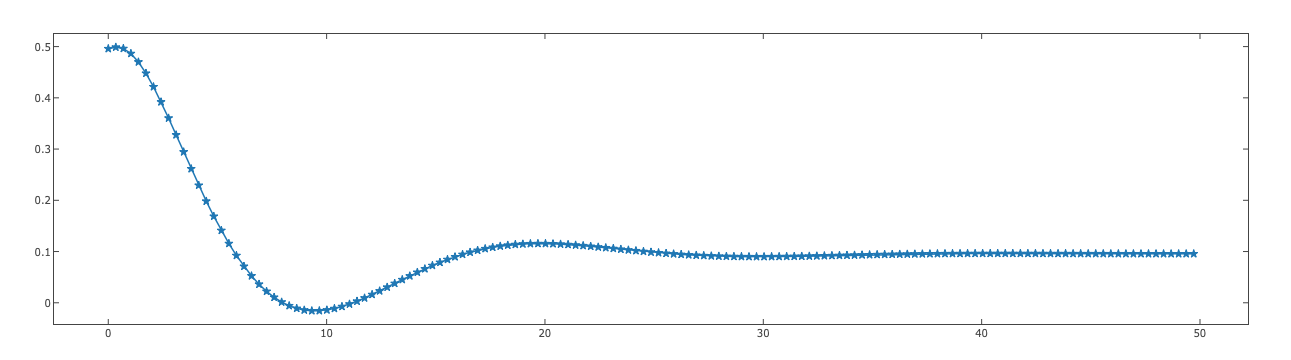

In [38]:
t=sp.r_[0:50:Tl]
giz=c.feedback(K*g2z*sarea)
t,y=c.step_response(giz,t)
plt.plot(t,y.T,'*-')
f=plt.gcf();py.iplot_mpl(f)
#azkenengo balioa
abal=1-1/(1+(K*g2z*sarea).horner(1))[0][0].real
#Balio maximoa
mbal=y.max()
print('Gaindiketa :',(mbal-abal)/abal)
guz=c.feedback(K*sarea,g2z)
t,u=c.step_response(guz,t)
plt.plot(t,u.T,'*-')
f=plt.gcf();py.iplot_mpl(f)

Ikusten denez, puntako denbora ~9s da eta gaindiketa %156, nahi denaren baino pixka bat baxuagoa.  Ikusita kontrol seinalea ez dela handia, aztertu daiteke Erroen Kokaera K-ren arabera diseinua hobetu ahal den (K handituz).

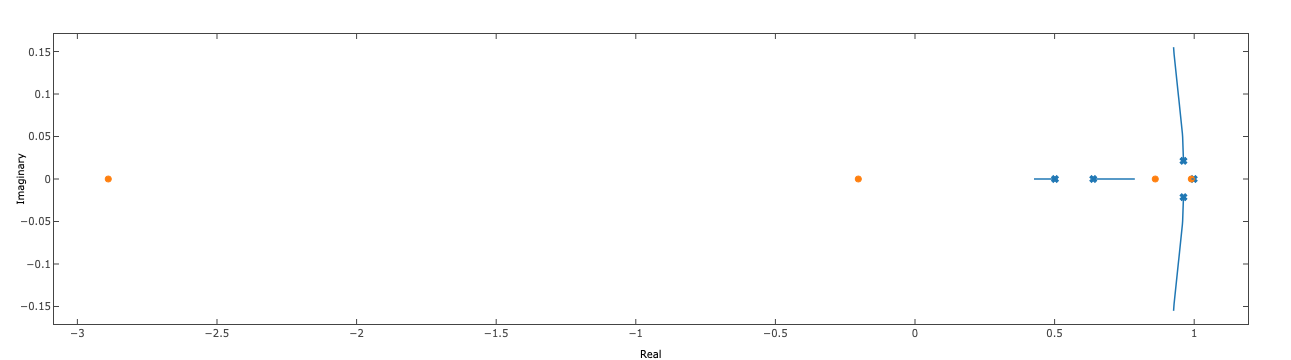

In [31]:
c.rlocus(K*g2z*sarea,sp.r_[0:2:0.05])
f=plt.gcf();py.iplot_mpl(f)

Diskretuan ez dago hain argi, baina K handituz dinamika oszilakorragoa egingo dela dirudi (polo konplexu konjukatu nagusiak begiratuta), gaindiketari dagokionez, Indartuko da K eta denbora eremuko azterketa errepikatuko da

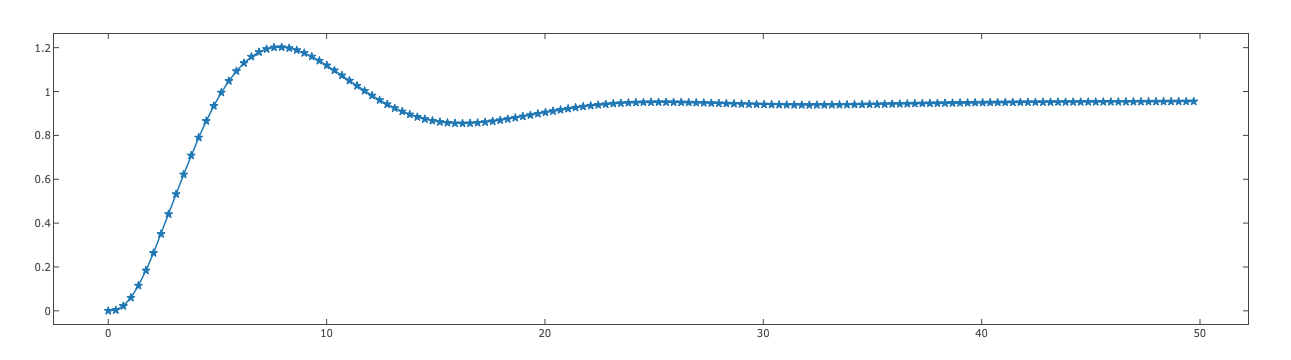

Gaindiketa : 0.23251724808760615


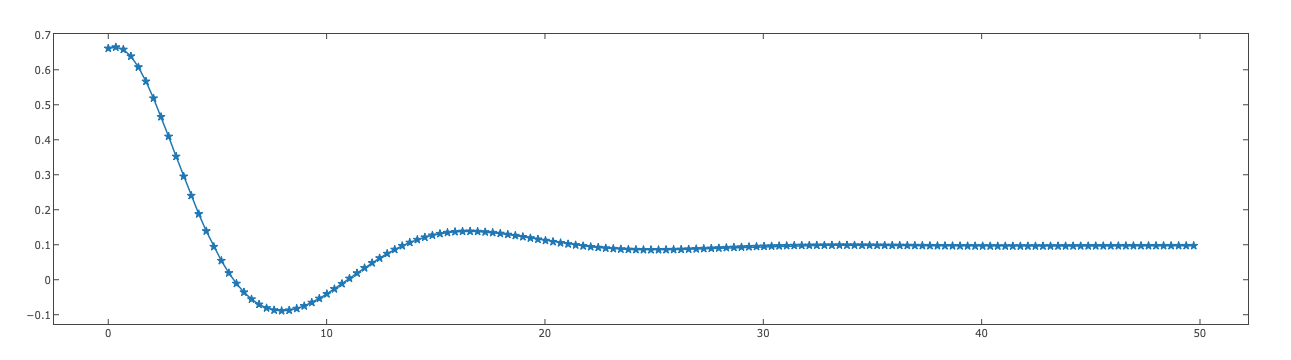

In [40]:
K=4
giz=c.feedback(K*g2z*sarea)
t,y=c.step_response(giz,t)
plt.plot(t,y.T,'*-')
f=plt.gcf();py.iplot_mpl(f)
#azkenengo balioa
abal=1-1/(1+(K*g2z*sarea).horner(1))[0][0].real
#Balio maximoa
mbal=y.max()
print('Gaindiketa :',(mbal-abal)/abal)
guz=c.feedback(K*sarea,g2z)
t,u=c.step_response(guz,t)
plt.plot(t,u.T,'*-')
f=plt.gcf();py.iplot_mpl(f)

K handituz, sistema oszilakorrgoa egiten da eta Kontrol, seinalea handiagoa (egokia izan daitekeena zona hilda bat baldin badago.